## This Project Implemented By  ِAreej Nouh  & Mohammad Ibrahim Mousa 
### Natural Language Processing and Information course 
### Final Project


# What is sentiment analysis?
Sentiment Analysis is the process of ‘computationally’ determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.

## Why sentiment analysis?

1. Business: In marketing field companies use it to develop their strategies, to understand customers’ feelings towards products or brand, how people respond to their campaigns or product launches and why consumers don’t buy some
products.

2. Politics: In political field, it is used to keep track of political view, to detect consistency and inconsistency between statements and actions at the government level. It can be used to predict election results as well!

3. Public Actions: Sentiment analysis also is used to monitor and analyse social phenomena, for the spotting of potentially dangerous situations and determining the general mood of the blogosphere.

In [2]:
# This code is to disable warnings that may display this notebook a liitle bit "ugly"
import warnings
warnings.filterwarnings('ignore')

# Imports
Here, all required packages in this project will be imported.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import string



from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import cross_val_score, KFold, train_test_split

from sklearn.pipeline import Pipeline

from sklearn.learning_curve import learning_curve

import pickle

from ipywidgets import widgets
from IPython.display import display
from IPython.display import clear_output


%matplotlib inline


C:\Users\Omar Najdi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Omar Najdi\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


### Import Arabic Stom Words

Hear, we will get arabic stop words from https://github.com/mohataher/arabic-stop-words

Largest list of Arabic stop words on Github. أكبر قائمة لمستبعدات الفهرسة العربية على جيت هاب


In [4]:
#get another arabic stop words from https://github.com/mohataher/arabic-stop-words
with open('stop_word_list.txt', encoding='utf-8') as word:
        stop_words_form_file=word.read().split("\n")

In [5]:
from nltk.corpus import stopwords
#get arabic stop words
stopwords_list = stopwords.words('arabic')

In [6]:
#append all stop words Which we own
all_arabic_stop_words=stop_words_form_file+stopwords_list
print(len(all_arabic_stop_words))
all_arabic_stop_words[0:10]

999


['،', 'ء', 'ءَ', 'آ', 'آب', 'آذار', 'آض', 'آل', 'آمينَ', 'آناء']

# Dataset:
We will use the News Data Set from https://archive.ics.uci.edu/ml/datasets/Twitter+Data+set+for+Arabic+Sentiment+Analysis



# Get the Data
The next code is to read the all.xlsl file that contain all data and set it as a dataframe called df.

In [7]:
xl = pd.ExcelFile('all.xlsx', encoding='utf-8')

df = xl.parse("Sheet1")

for i in range (1991):
    #to delete new line spiceal char and trim . 
    df['Twitt'][i]=df['Twitt'][i].replace("\n", "").strip()
    


df.head()

,Twitt,Class
0,﻿حقا,P
1,صح جدا,P
2,﻿اه و النعمة,P
3,كلامك جميل ورائع,P
4,﻿و خير الكلام ما قل و دل,P


# Helper Functions
These are the functions that will be used in this project

In [8]:
def count_words(str):
    '''
    This function is count the number of words in a given text.
    '''
    return len(str.split())

In [9]:
def RemoveDupliChar(Word):
    '''
    This function is Remove Duplicate Char of words in a given text.
    '''
    NewWord = " "
    index = 0
    for char in Word:
         if char != NewWord[index]:
            NewWord += char
            index += 1
    return (NewWord.strip()) 

In [10]:
#e.g
RemoveDupliChar("مرحباااااااا ككككيفك")

'مرحبا كيفك'

In [11]:
def text_process(mess):
    """
    This function takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Remove Duplicate Char
    mess=RemoveDupliChar(mess)
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    print(nopunc)
    # Now just remove any stopwords and return cleen text
    return ' '.join(word for word in nopunc.split() if word not in all_arabic_stop_words)

In [12]:
def read_from_pickle(pickle_fname):
    with open(pickle_fname+'.pickle', 'rb') as handle:
        return pickle.load(handle)

In [13]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    This function is to generate a simple plot of the test and traning learning curve.
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [14]:
def class_desc(p_class):
    '''
    This function is to return the description of Class.
    '''
    if p_class == 'P':
        strPN = 'Positive'
    elif p_class == 'N':
        strPN = 'Negative'
    elif p_class == 'p':
        strPN = 'Positive'
    elif p_class == 'N':
        strPN = 'Negative'
    else:
        p_class = 'Nutral'
    
    return strPN

# EDA
In this section, we are going to view the dataset structure and do some Exploration Analysis on the Data.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 2 columns):
Twitt    1991 non-null object
Class    1991 non-null object
dtypes: object(2)
memory usage: 31.2+ KB


In [16]:
df.describe()

,Twitt,Class
count,1991,1991
unique,1967,2
top,,P
freq,4,1000


### Data Preprocessing

We are going to create a new column called TWITT_LENGTH which represents the number of words in the Twitt column and This will help do some EDA analytics.

In [17]:
df['TWITT_LENGTH'] = df['Twitt'].apply(count_words)
df.head()

,Twitt,Class,TWITT_LENGTH
0,﻿حقا,P,1
1,صح جدا,P,2
2,﻿اه و النعمة,P,3
3,كلامك جميل ورائع,P,3
4,﻿و خير الكلام ما قل و دل,P,7


### Data Exploration

The following plot is to show the number of Twitt per each Class.

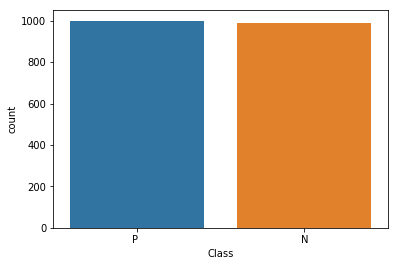

In [18]:
sns.countplot(x="Class", data=df)

 The following plot is to display the histogram according to the **TWITT_LENGTH** words count per each **Class**.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001ABC9A949E8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001ABC9D07EB8>], dtype=object)

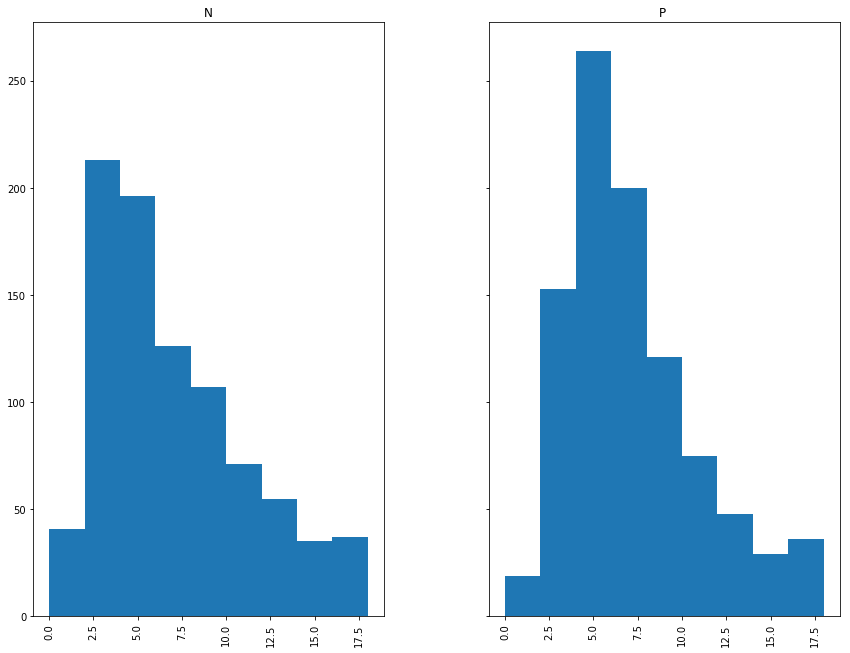

In [19]:

#g = sns.FacetGrid(df, col="Class", sharey=True)  
#g.map(plt.hist, "TWITT_LENGTH", bins=np.linspace(1, 20, 10))

df.hist(column='TWITT_LENGTH', by='Class', bins=range(0, 20,2),figsize=(14,11), sharey=True)

The following is to plot a boxplot to show the distribution of word counts (using **TWITT_LENGTH**column) per each **Class**.



(0, 30)

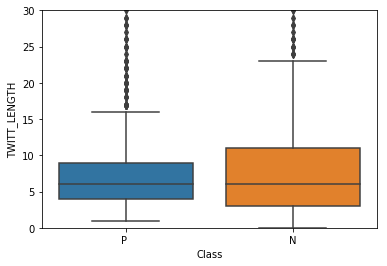

In [20]:
_= sns.boxplot(x='Class', y='TWITT_LENGTH', data = df)
_.set_ylim(0,30)

caption_0 = widgets.Label('Enter a number:')
text_0 = widgets.IntText(value=10)
button_0 = widgets.Button(description="Plot")
display(caption_0,text_0,button_0)

def histogram_label():
    n = text_0.value # Top n words
    corpus_size = 0
    i=1
    new_df = df[['Twitt','Class']]
    new_df['Twitt'] = df['Twitt'].apply(text_process).str
    classes = df.Class.unique()
    for classs in classes:
            new_df_title=new_df.query('Class ==  @classs')
            result =b" ".join(new_df_title['Twitt'].values.tolist()).split(" ")
            r = pd.DataFrame(result, columns=['WORDS'])
            corpus_size = corpus_size + len(r['WORDS'].unique())
            Counter_=Counter(result).most_common(n)
            labels = [item[0] for item in Counter_]
            number = [item[1] for item in Counter_]
            nbars = len(Counter_)
            plt.subplot(2,2,i)
            plt.xticks(rotation=90,fontsize=15)
            plt.yticks(fontsize=15)
            plt.title(class_desc(category), fontsize=18)
            plt.bar(np.arange(nbars), number, tick_label=labels)
            i=i+1
    return corpus_size

def handle_submit(sender):
    t = ("Plot is being performed! Please wait ...")
    sys.stdout.write('\r'+t)
    plt.figure(figsize=(15,10))
    s = histogram_label()
    plt.tight_layout()
    sys.stdout.write('\r'+'Corpus Size: ' + str(s))
    sys.stdout.flush()
    
button_0.on_click(handle_submit)

In [21]:
new_df = df[['Twitt','Class']]
new_df['Twitt'] = df['Twitt'].apply(text_process)

﻿حقا
صح جدا
﻿اه و النعمة
كلامك جميل ورائع
﻿و خير الكلام ما قل و دل
﻿ولا تنسو تبسمك في وجه اخيك صدقه
﻿ليتنا نستطيع الابتسامه في الاوقات المؤلمه
﻿و بحب الناس الرايقه الي بتضحك على طول
﻿ابتسم امام كل الناس لتسرهم و تجبر خواطرهم فتبسمك في وجوهم صدقه
﻿و اله انت حبيبي
﻿صح فالابتسامه تصنع السعاده
﻿الابتسامه جميله
﻿ابتسم بنيه طيبه و فقط
معك حق
لطيف
البسمه سر من اسرار الحياة
كل سنه وانتم طيبين
﻿أجمل ابتسامه
الابتسامه كلمه طيبه بغير حروف
أفعال لا تضاهيها أقوال
أفعال لا تحتاج إلى أقوال
الابتسامة كلمة بدون حروف
صحيح الابتسامه لها تعابير كثيره
اضحك تضحكلك الدني
انا احب هذا الكاتب
﻿ابتسم و هدي اعصابك
﻿كلام طيب
﻿و خير الابتسامة
روعة الاشياء تبقى روائحها بقى اصحابها ام انصرفوا
﻿صدقتي رائعه و معبره الكلام
هذه من أقوال الرفيق المناضل
﻿مش عارف لية بيتحوله و هما الى دواره عليك وكان نفسهم تكون معاهم فى الأول
﻿احلى شىء النهاية الباقية صح كلامك
﻿فعلا في البداية كلهم رائعون
﻿الذي طبعه رائع ما يمكن ان يتغير راح يبقه رائع
الحل الوحيدحب اله ورسوله وطاعتهم
هذا هو المهم
نعم فى البدايه كلهم اروع من الروعة
﻿الرائع س

﻿الحمد له الذى لا يُحمد على مكره سواه
﻿الحمد له رب العالمين على عطاه و رضا
أن اله موجود
﻿يا رب رضينا و امنا و صدقنا  فارضينا برضاك عنا  و اجبر كسر قلوبنا و هون علينا
﻿صدقت يا رب إجعلنا راضين بقدرك
﻿انشاء اله نكون راضين بقضاء اله و لكنا نرجو من اله الطف فيه
﻿الهم اصلح سرى و علانيتى
﻿ساعات الى فى السر هو الى بيخلى الناس تحبك فى العلن من غير ما يكونوا عارفين الا انهم بيحبوك من غير سب
﻿يا رب الهم اجعلنى خير ما يظنون و اغفر لى ما لا يعلمون
﻿ربنا يصلح احوالنا يا رب ظاهرا و باطن
﻿الهم اجعلنا من تنظر اليهم بحب و اشتياق و اجعلنا من عبادك التوابين المخلصين العابدين الحق لدينك و احفظنا و قنا نار وقودها الناس و الحجاره يا رب
﻿الهم اجعل سريرتي خير من على نيتي و اجعل على نيتي صالحة
الهم احفظني
اله يبارك لنا فى ايامنا
الهم اصلح نفوسنا لما يرضيك عنها
﻿نحن نحبك في اله و ندعو لك بظهر الغيب
﻿الهم اجعلنى خيرا ما يظنون و اغفر لي ما لا يعلمون
الهم ارزقنا الاخلاص
﻿الهم لا تدع لى ذنبا الا غفرتة  الهم اصلح لى دينى
﻿الاخلاص الهم انا نسالك الاخلاص فى القول و العمل و السر و العلن
﻿من بغضه رب العالمين لن يحبه احد 

عنجد بخزي شو هاد على حساب ازياء طلع باله
﻿ لا واله ما بلسه يع
بخزي
عنجد انو بالة
﻿و ارضيت يا دولة الرئيس تكون  اله اسهل عليك يا عون الخصاونه
﻿شو عاجبك فيها متلا ؟لتكون سيارتكم
عني كل يعلقو الا انا
واله نوفي صح لسانك
لا مو حلو
خلص اخرسن انا قرفت اكتر منكن
﻿مزعج الي كثير
﻿قرف
ما شاء اله واله انها امر متل الكرتون
نحن في زمن يهان فيه المرء ويكرم فيه الكلب
لا احدالاخوة
اجل اسقاط حكومة طروانة
ما انا شطبت
عنجد بخزي
مش حلو
صراحة بخزي من دون مجاملة
بعرف بس مو حلو
الوان مش حلوة
مش طبيعي
بعئد
هاض بعرفو بس مقرف
وسدئيني انكو كلاب
﻿معظم اصحاب محطات الوقود و وكالات الغاز متنفذين لقد زاد الغني غنى و الفقير فقر
احقر من هيك خيانة ما في
ﻣﻴﻦ ﺑﻀﻞ ﻳﺸﻴﻞ ﺍﻟﺸﺒﺸﺐ ﻣﻦ ﺟﻤﺒﻲ
ما بكره حد قدك
الكلب حده﻿ روعه
﻿إبداع يا أبو يوسف﻿  و اله حرام يطلع من البرنامج  العتب على المصوتين  أتوقع لك مستقبل زاهر يا بطل  صوت جميل جداً  الي يقول إنه إنظلم يعطيني  لايك 
حبيبي شرلبوني يموت ب شرلبونا و انا مدريدي﻿ لكن ماني مغير لعيونه
الي لفت انتباهي الدبه الي﻿ جنبها
انت عنجد بنت فاشلة
ابوها هوه﻿ المصيبة بس همه الفلوس الي تجيبها بنته
دلو

In [22]:
new_df[0:10]



,Twitt,Class
0,﻿حقا,P
1,صح,P
2,﻿اه النعمة,P
3,كلامك جميل ورائع,P
4,﻿و خير الكلام قل دل,P
5,﻿ولا تنسو تبسمك وجه اخيك صدقه,P
6,﻿ليتنا نستطيع الابتسامه الاوقات المؤلمه,P
7,﻿و بحب الناس الرايقه بتضحك طول,P
8,﻿ابتسم الناس لتسرهم تجبر خواطرهم فتبسمك وجوهم ...,P
9,﻿و اله انت حبيبي,P


In [23]:
#new_df

# Classification

 According to EDA, it can be seen that the most significant feature is: Twitt. In the next code, we are going to create two objects X and y. X will be the 'Twitt' column of **' new_df '** dataset. Moreover, as our case is supervised, y will be the class which is the Class column of our exploited dataset.

In [24]:
x = new_df.Twitt
y = new_df.Class

# Train Test Split
Following the best practices, we are going to split our data into training and testing data.

In [25]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1393,) (598,) (1393,) (598,)


# Training Model
In this piece of work, we will implement different models and show the classification output according to each one. Then, the final result of prediction will be based on the result of all predictions as it will be presnted in the follwoing sections.

In order to make the procees of processing; vectorizer => transformer => classifier, easier, we will create a pipeline with the following steps:

1.CountVectorizer().
2.TfidfTransformer().
3.Classifer; Suitable Supervised Model.

#### Training using Multinomial Naive Bayes

In [26]:
from sklearn.naive_bayes import MultinomialNB

# Initializing Pipline
pipelineNB = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts   ====  analyzer=normalize_text
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors
])

#print(pipelineNB)
# Training the model
pipelineNB.fit(X_train, y_train)


# Saving training results using Pickle
with open('pipelineNB.pickle', 'wb') as handle:
    pickle.dump(pipelineNB, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Predictions
predictionsNB = pipelineNB.predict(X_test)

# Model Evaluation
print(classification_report(predictionsNB, y_test))


             precision    recall  f1-score   support

          N       0.83      0.84      0.84       290
         P        0.85      0.84      0.85       308

avg / total       0.84      0.84      0.84       598



In [27]:
# This is just for testing purposes :)
with open('pipelineNB.pickle', 'rb') as handle:
    NB = pickle.load(handle)
NB.predict(["يلعن صباحك"])[0]

'N'

### Cross Validation

In [28]:
%time scoresNB = cross_val_score(pipelineNB, X_train, y_train, cv = 5)
print("Cross-validation scores: {}".format(scoresNB))
print("Average cross-validation score: {:.2f} +/- {:.2f}".format(scoresNB.mean(), scoresNB.std()))
scoresNB = scoresNB.mean()

Wall time: 351 ms
Cross-validation scores: [ 0.825       0.83512545  0.86330935  0.88848921  0.84172662]
Average cross-validation score: 0.85 +/- 0.02


Wall time: 8 s


<module 'matplotlib.pyplot' from 'C:\\Users\\Omar Najdi\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

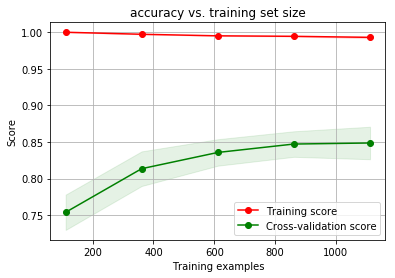

In [29]:
%time plot_learning_curve(pipelineNB, "accuracy vs. training set size", X_train, y_train, cv=5)


### Training using Decision Tree Classifier


In [30]:
from sklearn.tree import DecisionTreeClassifier

pipelineDT = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts   === analyzer=normalize_text
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', DecisionTreeClassifier(max_depth=10,random_state=0)),  # train on TF-IDF vectors
])

%time pipelineDT.fit(X_train, y_train)

# Saving training results using Pickle
with open('pipelineDT.pickle', 'wb') as handle:
    pickle.dump(pipelineDT, handle, protocol=pickle.HIGHEST_PROTOCOL)

predictionsDT = pipelineDT.predict(X_test)

print(classification_report(predictionsDT, y_test))

Wall time: 59 ms
             precision    recall  f1-score   support

          N       0.88      0.63      0.73       410
         P        0.50      0.81      0.62       188

avg / total       0.76      0.69      0.70       598



### Cross Validation

In [31]:
%time scoresDT = cross_val_score(pipelineDT, X_train, y_train, cv = 5)
print("Cross-validation scores: {}".format(scoresDT))
print("Average cross-validation score: {:.2f} +/- {:.2f}".format(scoresDT.mean(), scoresDT.std()))
scoresDT = scoresDT.mean()

Wall time: 292 ms
Cross-validation scores: [ 0.69285714  0.74551971  0.70863309  0.74100719  0.75179856]
Average cross-validation score: 0.73 +/- 0.02


Wall time: 8.08 s


<module 'matplotlib.pyplot' from 'C:\\Users\\Omar Najdi\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

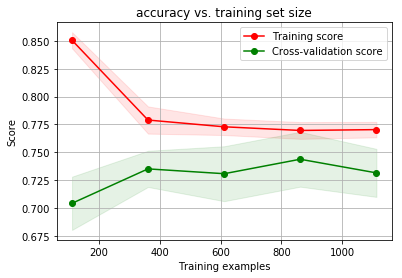

In [32]:
%time plot_learning_curve(pipelineDT, "accuracy vs. training set size", X_train, y_train, cv=5)


### Training using SVM


In [33]:
from sklearn.svm import LinearSVC


pipelineSV = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts   === analyzer=normalize_text
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LinearSVC()),  # train on TF-IDF vectors
    #('classifier', svm.SVC(probability=True)),  # train on TF-IDF vectors
])

%time pipelineSV.fit(X_train, y_train)

# Saving training results using Pickle
with open('pipelineSV.pickle', 'wb') as handle:
    pickle.dump(pipelineSV, handle, protocol=pickle.HIGHEST_PROTOCOL)

predictionsSV = pipelineSV.predict(X_test)

print(classification_report(predictionsSV, y_test))

Wall time: 84.1 ms
             precision    recall  f1-score   support

          N       0.85      0.81      0.83       308
         P        0.81      0.85      0.83       290

avg / total       0.83      0.83      0.83       598



In [34]:

# This is just for testing purposes :)
with open('pipelineSV.pickle', 'rb') as handle:
    SV = pickle.load(handle)
SV.predict(["See Mark Hamill prank 'Star Wars' superfans"])[0]

'N'

### Cross Validation

In [35]:
%time scoresSV = cross_val_score(pipelineSV, X_train, y_train, cv = 5)
print("Cross-validation scores: {}".format(scoresSV))
print("Average cross-validation score: {:.2f} +/- {:.2f}".format(scoresSV.mean(), scoresSV.std()))
scoresSV = scoresSV.mean()

Wall time: 391 ms
Cross-validation scores: [ 0.82142857  0.83870968  0.84532374  0.87769784  0.85971223]
Average cross-validation score: 0.85 +/- 0.02


Wall time: 9.4 s


<module 'matplotlib.pyplot' from 'C:\\Users\\Omar Najdi\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

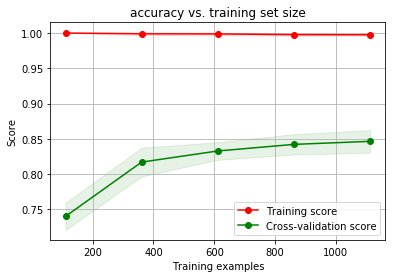

In [36]:
%time plot_learning_curve(pipelineSV, "accuracy vs. training set size", X_train, y_train, cv=5)


### Training using Neural-Network


In [37]:
from sklearn.neural_network import MLPClassifier

# Initializing Pipline
pipelineMLP = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts   ====  analyzer=normalize_text
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MLPClassifier(hidden_layer_sizes=2)),  # train on TF-IDF vectors   # hidden_layer_sizes=2
])

# Training the model
%time pipelineMLP.fit(X_train, y_train)

# Saving training results using Pickle
with open('pipelineMLP.pickle', 'wb') as handle:
    pickle.dump(pipelineMLP, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Predictions
predictionsMLP = pipelineMLP.predict(X_test)

# Model Evaluation
print(classification_report(predictionsMLP, y_test))

Wall time: 1.71 s
             precision    recall  f1-score   support

          N       0.85      0.82      0.83       305
         P        0.82      0.85      0.83       293

avg / total       0.83      0.83      0.83       598



### Cross Validation

In [38]:
%time scoresMLP = cross_val_score(pipelineMLP, X_train, y_train, cv = 5)
print("Cross-validation scores: {}".format(scoresMLP))
print("Average cross-validation score: {:.2f} +/- {:.2f}".format(scoresMLP.mean(), scoresMLP.std()))
scoresMLP = scoresMLP.mean()

Wall time: 12.8 s
Cross-validation scores: [ 0.83571429  0.81362007  0.77697842  0.86330935  0.79856115]
Average cross-validation score: 0.82 +/- 0.03


In [39]:
#%time plot_learning_curve(predictionsMLP, "accuracy vs. training set size", X_train, y_train, cv=5)


# System Evaluation and Deployment

In this section we will create the ensemble_predic funtion. This function will take in a text, which is the Twitt , then it gives back the Class of the given Twitt. The prediction works as follows. It predict the **Class** of the given text employing different supervised learning models. As the label is discrete, then, we have employed different classifiers as shown in the Twitt Classification section. The prediction result is based on the highest mean of each Class group.

In [40]:
import lime
import sklearn
import numpy as np
import sklearn
import sklearn.ensemble
import sklearn.metrics
from __future__ import print_function
from lime import lime_text
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer
from sklearn.svm import LinearSVC

In [41]:
def ensemble_predic(p_title):
    
    
    results = pd.DataFrame({'model' : pd.Series(['NB','DT', 'SV','MLP'], index=['1', '2', '3','4']),
                            'class' : pd.Series([read_from_pickle('pipelineNB').predict([p_title])[0], 
                                                 read_from_pickle('pipelineDT').predict([p_title])[0],
                                                 read_from_pickle('pipelineSV').predict([p_title])[0],
                                                 read_from_pickle('pipelineMLP').predict([p_title])[0]], index=['1', '2', '3','4']),
                           'percent' : pd.Series([scoresNB, 
                                                 scoresDT,
                                                 scoresSV,
                                                 scoresMLP], index=['1', '2', '3','4'])})

    errors_average = results['percent'].mean() - results['percent'].std()
   
   
    model=results[results.percent >= errors_average].groupby('model')['percent'].mean().idxmax()
    result=results[results.percent >= errors_average].groupby('class')['percent'].mean().idxmax()
    #print(result)
    class_names = ['P','N']
    explainer = LimeTextExplainer(class_names=class_names)
    exp = explainer.explain_instance(p_title,read_from_pickle('pipeline'+model).predict_proba, num_features=2)
   
    exp.save_to_file('oi.html')
   # exp.show_in_notebook(text=True)
    
    
   
    
    print(results)
    
    
    return result

## Model Evaluation

 In this sub-section we will evaluate our model using the Test set resulted from the split preocess. We will calculate the expected prediction using the ensemble_predic function, and compare the prediction results against the actual category of each story in the test set. Significantly, without a normalizing function; specifically removing stops words; the results seem to be better in terms of accuracy.
 
 


In [42]:
 #X_test_pred = X_test[0::].apply(ensemble_predic) # to predict all test Data

## Model Deployment

In this sub-section, we have built a simple user interface that accepts a text and gives back the most likely classification.

In [43]:
caption = widgets.Label('Enter an article here:')
text = widgets.Textarea()
button = widgets.Button(description="Classify")
display(caption,text,button)

def handle_submit(sender):
    message = text.value
    clear_output()
    print('Text: '+message)
    print('\n')
    message=text_process(message)
    print('Text after proccising: '+message)
    result=ensemble_predic(message)
    print('Most likely prediction: ', class_desc(result.strip()))
    print('\n-----------------------------------------------------------------------')
    print('P = Positive, N = Negative')
    
button.on_click(handle_submit)



Text: يفضححححح عرض اليهوود !!


يفضح عرض اليهود 
Text after proccising: يفضح عرض اليهود
  class model   percent
1     N    NB  0.850730
2     N    DT  0.727963
3     N    SV  0.848574
4     N   MLP  0.817637
Most likely prediction:  Negative

-----------------------------------------------------------------------
P = Positive, N = Negative


# Conclusion and Future Work
In this project, Sentiment analysis has been developed. Some supervised learning machine learning models were employed in the prediction of the Class of the twitt. As seen in the deployment section, each model could give different results from otherclassifiers, and so, the final result was calculated based on the highest mean of a ctegory result.


As seen in this piece of work, the data tested was for Twitts witten in the Arabic language. As a futeure work, we will re-train and test our model on twitts in the other Languges and to understand the Expression faces that are attached to the text and which are an important part of the analysis. An aggregator can also be built employing the desired classifier.This system will be able to collect Tweets based on a specific Words and analysis that is of an interest of a specific user.